# Climate Challenge Analysis : SQLAlchemy/Pandas/Matplotlib
## Anthony Elkadi 
### Case Western Reserve - Data Analytics Program

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [11]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect 

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Reflecting an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [13]:
# Viewing Classes / table names
Base.classes.keys()

inspector = inspect(engine)

inspector.get_table_names()

['measurement', 'station']

In [8]:
# Saving references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Creating the session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [18]:
# Designing a query to retrieve the last date of percipitation data 
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date) 

#Finding the last 12 months by subtracting the last day by 365
last_12_months = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_12_months)


('2017-08-23',)
2016-08-23


In [20]:
# Performing a query to retrieve the data and precipitation scores
rain = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date > last_12_months).\
        order_by(Measurement.date).all()

In [22]:
# Loading the data from the query into a dataframe
rain_df = pd.DataFrame(rain)
rain_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [23]:
# reseting the index to the date
rain_df.set_index('date').head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


In [42]:
# Sorting the dataframe by the last to most recent date
rain_df.sort_values('date', inplace=True, ascending=True)

print(rain_df)

            date  prcp
0     2016-08-24  0.08
2     2016-08-24  2.28
4     2016-08-24  1.22
6     2016-08-24  1.45
1     2016-08-24  2.15
3     2016-08-24   NaN
5     2016-08-24  2.15
7     2016-08-25  0.08
8     2016-08-25  0.08
9     2016-08-25  0.00
10    2016-08-25  0.00
11    2016-08-25  0.21
12    2016-08-25  0.06
13    2016-08-25  0.11
16    2016-08-26  0.02
14    2016-08-26  0.00
15    2016-08-26  0.03
18    2016-08-26  0.00
19    2016-08-26  0.01
17    2016-08-26  0.04
21    2016-08-27  0.18
23    2016-08-27  0.00
24    2016-08-27  0.12
20    2016-08-27  0.00
25    2016-08-27   NaN
22    2016-08-27  0.02
26    2016-08-28  0.01
27    2016-08-28  0.14
28    2016-08-28  0.14
29    2016-08-28  0.14
...          ...   ...
2193  2017-08-16  0.00
2194  2017-08-16  0.07
2195  2017-08-16  0.12
2196  2017-08-16  0.42
2197  2017-08-17  0.00
2198  2017-08-17  0.05
2199  2017-08-17  0.01
2200  2017-08-17  0.13
2201  2017-08-18  0.00
2202  2017-08-18  0.00
2203  2017-08-18  0.06
2204  2017-

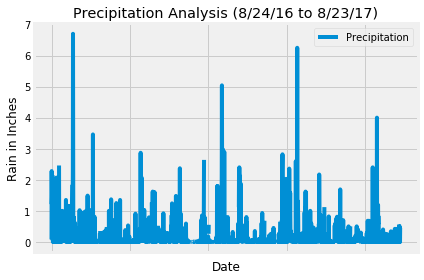

In [43]:
# Using Pandas Plotting with Matplotlib to plot the data

rain_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis (8/24/16 to 8/23/17)")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [45]:
# Using Pandas to calcualte the summary statistics for the precipitation data

rain_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [47]:
# Designing a query to show how many stations are available in this dataset

locations = session.query(Measurement).group_by(Measurement.station).count()
print("There are {} stations.".format(locations))

There are 9 stations.


In [48]:
# Finding the most active stations and listing them with their counts in descending order
busy_station = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
               order_by(func.count(Measurement.tobs).desc()).all()

busiest = busy_station[0][0]    
print("The busiest Station was",busiest,"with",busy_station[0][1],"weather observations.")
print()
print("Here are all of the Stations (in descending order) with their number of observations:")
for station, count in busy_station:
    print("Station",station,"had",count, "weather observations.")


The busiest Station was USC00519281 with 2772 weather observations.

Here are all of the Stations (in descending order) with their number of observations:
Station USC00519281 had 2772 weather observations.
Station USC00519397 had 2724 weather observations.
Station USC00513117 had 2709 weather observations.
Station USC00519523 had 2669 weather observations.
Station USC00516128 had 2612 weather observations.
Station USC00514830 had 2202 weather observations.
Station USC00511918 had 1979 weather observations.
Station USC00517948 had 1372 weather observations.
Station USC00518838 had 511 weather observations.


In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [69]:
# Calculating the lowest temperature recorded

temperature = session.query(func.min(Measurement.tobs), Measurement.date, Measurement.station).all()
print(temperature)

# Calculating the highest temperature recorded
temperature = session.query(func.max(Measurement.tobs), Measurement.date, Measurement.station).all()
print(temperature)

[(53.0, '2013-04-02', 'USC00511918')]
[(87.0, '2010-08-23', 'USC00519397')]


In [72]:
# Choosing the station with the highest number of temperature observations
temperature = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == busiest).\
    filter(Measurement.date > last_12_months).\
    order_by(Measurement.date).all()

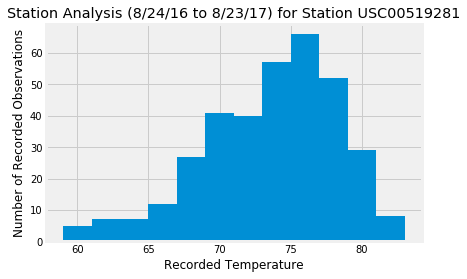

In [73]:
# Querying the last 12 months of temperature observation data for this station and plotting the results as a histogram
temp_df=pd.DataFrame(temperature)
plt.hist(temp_df['tobs'],12)
plt.xlabel("Recorded Temperature")
plt.ylabel("Number of Recorded Observations")
plt.title("Station Analysis (8/24/16 to 8/23/17) for Station " + busiest)
plt.show()

![precipitation](Images/station-histogram.png)

In [75]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [76]:
# Using previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

trip_arrive = dt.date(2018, 4, 1)
trip_leave = dt.date(2018, 4, 15)
last_year = dt.timedelta(days=365)
temp_avg_lst_year = (calc_temps((trip_arrive-last_year), (trip_leave-last_year)))
print(temp_avg_lst_year)

[(67.0, 74.47368421052632, 82.0)]


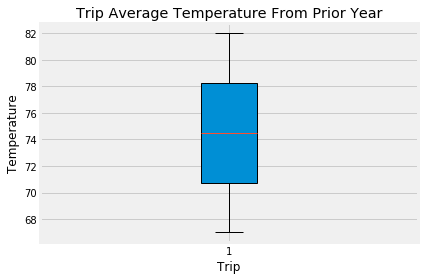

In [81]:
# Plotting the results as a boxplot

fig, ax = plt.subplots()
x = range(len(temp_avg_lst_year))
ax.boxplot(temp_avg_lst_year, patch_artist=True)
ax.set_title('Trip Average Temperature From Prior Year')
ax.set_ylabel("Temperature")
ax.set_xlabel("Trip")
fig.tight_layout()
plt.show()

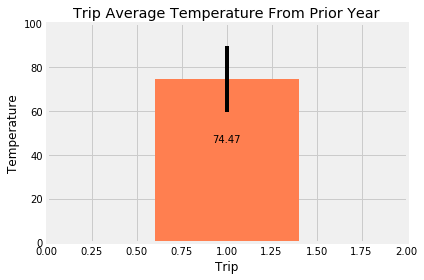

In [86]:
# plotting the calculated min/max/avg from last year for the trip dates as a bar chart

p2p = temp_avg_lst_year[0][2]-temp_avg_lst_year[0][0]
avgtemp = temp_avg_lst_year[0][1]
min_temp = temp_avg_lst_year[0][0]
max_temp = temp_avg_lst_year[0][2]

fig, ax = plt.subplots()
bar_chart = ax.bar(1 , avgtemp, color= 'coral', yerr=p2p)
ax.set_xlabel("Trip")
ax.set_ylabel("Temperature")
ax.set_title("Trip Average Temperature From Prior Year")

def autolabels(rects):
    for rect in rects:
        h=rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., .6*h,'%.2f' % float(h) ,ha='center', va='bottom', fontsize=10)

        
# labeling the bars 
autolabels(bar_chart)        
plt.ylim(0, 100)
plt.xlim(0,2)
fig.tight_layout()
plt.show()